In [1]:
import testing as tst
from matplotlib import pyplot as plt
import fredpy as fp
import os
import pandas as pd
from talib import MA as ma
import numpy as np
from dotenv import load_dotenv
load_dotenv()
fp.api_key = os.getenv("FREDPY_API_KEY")

Internet connection required. Check connection.


In [2]:
hawkishness = tst.create_index("prompt_1", "gpt-3.5-turbo")

2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20110622.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20170920.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20190918.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20140319.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20130918.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20210728.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20230920.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20200303.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20210616.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20120125.json
2023-10-13 17:17:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20

In [3]:
# rate = fp.series("DGS5").data.reindex(hawkishness.index)
rate = fp.series("DGS1").data[hawkishness.index[0]:].dropna()
inflation = fp.series("CPIAUCSL").data.pct_change(12)[hawkishness.index[0]:].dropna()*100

In [4]:
hawkishness_test = ma(hawkishness, 100)
hawkishness_test.index += pd.DateOffset(days = 60)

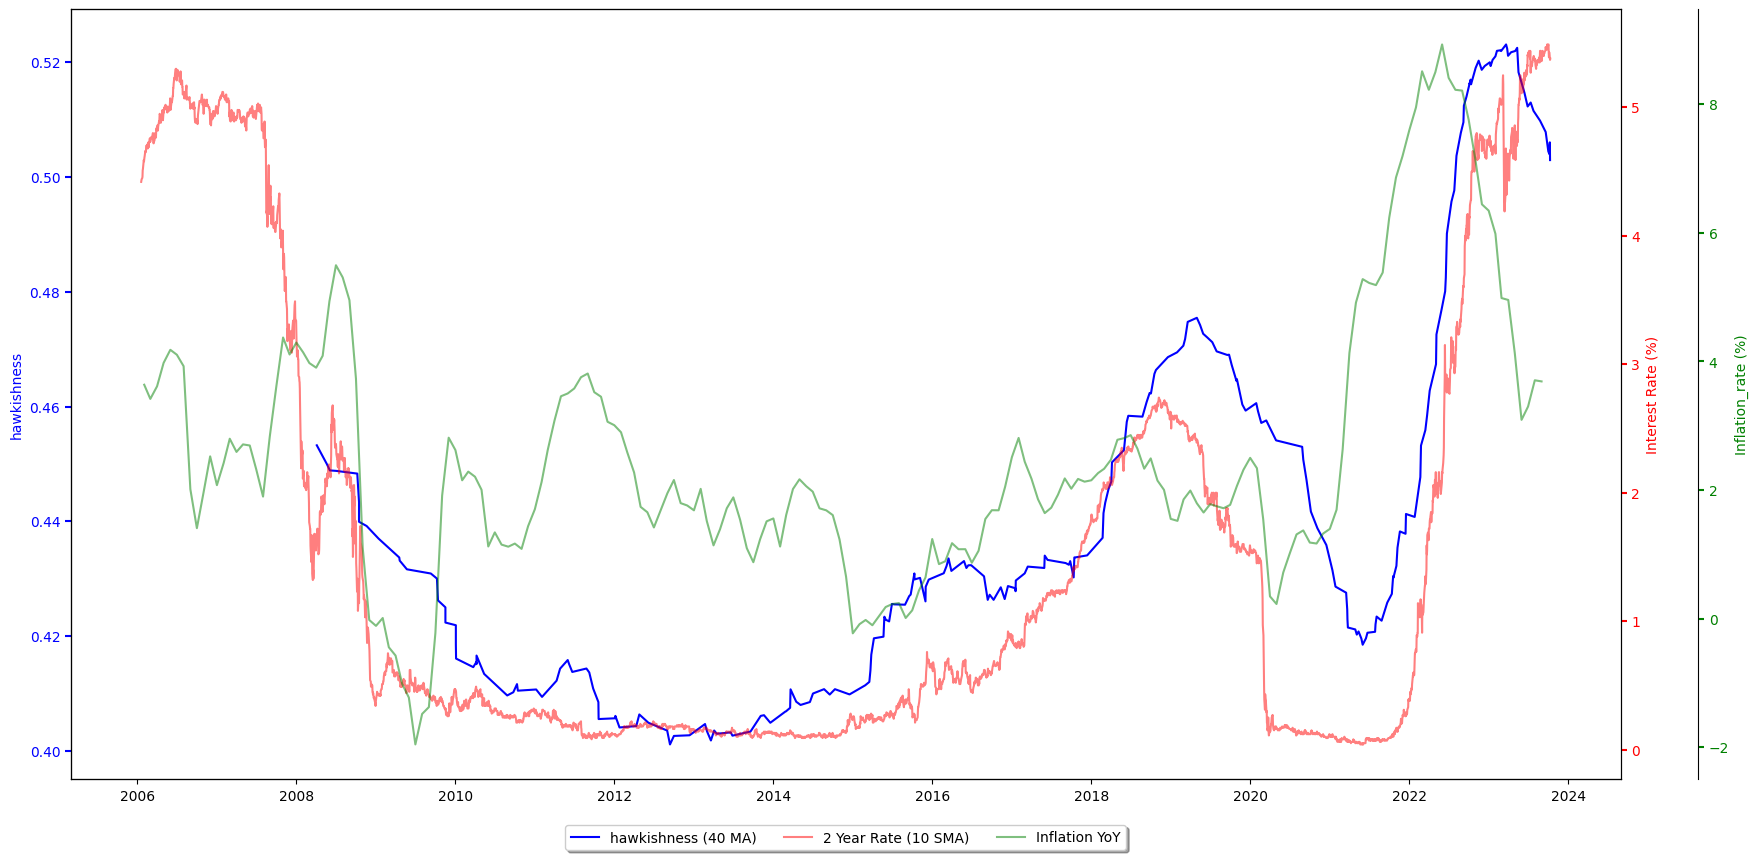

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
# ln1 = ax.plot(hawkishness, "-o", alpha = 0.3, color = "grey", label = "Hawkishness")
ln2, = ax.plot(ma(hawkishness, 40), color = "blue", label = "hawkishness (40 MA)")
ax2 = ax.twinx()
ln3, = ax2.plot(rate, color = "red", label = "2 Year Rate (10 SMA)", alpha = 0.5)
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.05))
ln4, = ax3.plot(inflation, color = "green", label = "Inflation YoY", alpha = 0.5)
lns = [ln2, ln3, ln4]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel("hawkishness")
ax2.set_ylabel("Interest Rate (%)")
ax3.set_ylabel("Inflation_rate (%)")
ax.yaxis.label.set_color(ln2.get_color())
ax2.yaxis.label.set_color(ln3.get_color())
ax3.yaxis.label.set_color(ln4.get_color())
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=ln2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=ln3.get_color(), **tkw)
ax3.tick_params(axis='y', colors=ln4.get_color(), **tkw)

In [6]:
rate = fp.series("DGS5").data[hawkishness.index[0]:].dropna()

In [7]:
corr_df_logs = tst.get_correlation_df(hawkishness, rate, range(10, 101, 10), range(-60, 61, 10), True)
corr_df_levels = tst.get_correlation_df(hawkishness, rate, range(10,101,10), range(-60,61,10), False)

In [8]:
max_level_val = corr_df_levels.values.max()
max_level_loc = corr_df_levels[corr_df_levels == max_level_val].stack().index[0]
max_log_val = corr_df_logs.values.max()
max_log_loc = corr_df_logs[corr_df_logs == max_log_val].stack().index[0]
print(f"{max_level_loc}: {max_level_val}", "\n", f"{max_log_loc}: {max_log_val}")

('shift_-40', 'ma_40'): 0.8104186373700861 
 ('shift_-50', 'ma_10'): 0.3047587650984373


In [9]:
corr_df_logs

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,0.284322,0.202262,0.180535,0.188851,0.16354,0.119152,0.173939,0.118806,0.136963,0.195748
shift_-50,0.304759,0.229061,0.208866,0.198714,0.141263,0.160496,0.167155,0.154604,0.147981,0.187098
shift_-40,0.243444,0.214294,0.165782,0.161475,0.15892,0.140269,0.096016,0.127024,0.1293,0.135869
shift_-30,0.206893,0.188607,0.176632,0.165096,0.166255,0.13761,0.138644,0.112304,0.125272,0.16794
shift_-20,0.152328,0.126481,0.16288,0.127746,0.175339,0.08964,0.119729,0.015359,0.040552,0.073477
shift_-10,0.154875,0.190784,0.125726,0.073434,0.118908,0.048792,0.088979,0.107289,0.002741,0.00765
shift_0,0.07238,0.122833,0.129311,0.029123,0.12261,0.018488,0.072403,0.111387,0.01467,0.084195
shift_10,0.067394,0.159202,0.14067,-0.005699,0.114491,-0.012983,0.03664,0.112901,0.075749,0.105415
shift_20,0.120012,0.22668,0.121295,0.015468,0.106215,0.028727,0.020755,0.162462,0.081743,0.085625
shift_30,0.04202,0.146535,0.079445,-0.011722,0.06206,-0.039762,0.011984,0.02088,0.078259,0.023233


In [10]:
corr_df_levels

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,0.502255,0.627661,0.733395,0.793296,0.78933,0.751758,0.711255,0.672577,0.653199,0.658778
shift_-50,0.523401,0.646589,0.750648,0.799377,0.793709,0.757696,0.721557,0.685903,0.667019,0.669889
shift_-40,0.548899,0.671739,0.770559,0.810419,0.801411,0.762118,0.725316,0.693508,0.675253,0.676712
shift_-30,0.556421,0.677892,0.769137,0.807133,0.798009,0.760758,0.723168,0.690095,0.670364,0.670363
shift_-20,0.561894,0.685622,0.772528,0.809181,0.802746,0.766494,0.729782,0.697977,0.679383,0.678898
shift_-10,0.576751,0.697015,0.776436,0.80585,0.794414,0.756429,0.72419,0.696844,0.681243,0.681455
shift_0,0.597481,0.711484,0.787803,0.808816,0.794163,0.758935,0.729045,0.703961,0.687476,0.685793
shift_10,0.602866,0.713367,0.788551,0.794433,0.772651,0.728372,0.690159,0.668389,0.658439,0.664752
shift_20,0.61488,0.725099,0.794277,0.796877,0.772153,0.727678,0.691694,0.672632,0.663726,0.667234
shift_30,0.630788,0.737405,0.797923,0.791096,0.758918,0.714801,0.681185,0.664962,0.657948,0.662767


In [12]:
tst.get_regression_df(hawkishness, rate, False, range(10,101,10), range(-60, 61, 10))

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,-971.3,-1022.,-1085.,-1134.,-1132.,-1106.,-1080.,-1050.,-1011.,-973.2
shift_-50,-979.2,-1033.,-1100.,-1141.,-1137.,-1111.,-1086.,-1057.,-1017.,-977.9
shift_-40,-989.5,-1048.,-1117.,-1153.,-1144.,-1114.,-1089.,-1061.,-1021.,-980.9
shift_-30,-992.7,-1052.,-1116.,-1149.,-1141.,-1113.,-1087.,-1059.,-1019.,-978.1
shift_-20,-995.1,-1057.,-1119.,-1151.,-1146.,-1118.,-1092.,-1063.,-1023.,-981.9
shift_-10,-1002.,-1065.,-1123.,-1148.,-1137.,-1110.,-1088.,-1063.,-1024.,-983.1
shift_0,-1012.,-1075.,-1134.,-1151.,-1137.,-1112.,-1091.,-1066.,-1027.,-985.0
shift_10,-998.2,-1061.,-1119.,-1124.,-1113.,-1089.,-1070.,-1043.,-1002.,-960.6
shift_20,-1004.,-1069.,-1125.,-1126.,-1113.,-1088.,-1071.,-1045.,-1004.,-961.7
shift_30,-1009.,-1075.,-1125.,-1118.,-1101.,-1080.,-1066.,-1039.,-998.7,-956.0


In [13]:
log_series = tst.get_equivalent_series(hawkishness, rate, True, 10, -50)

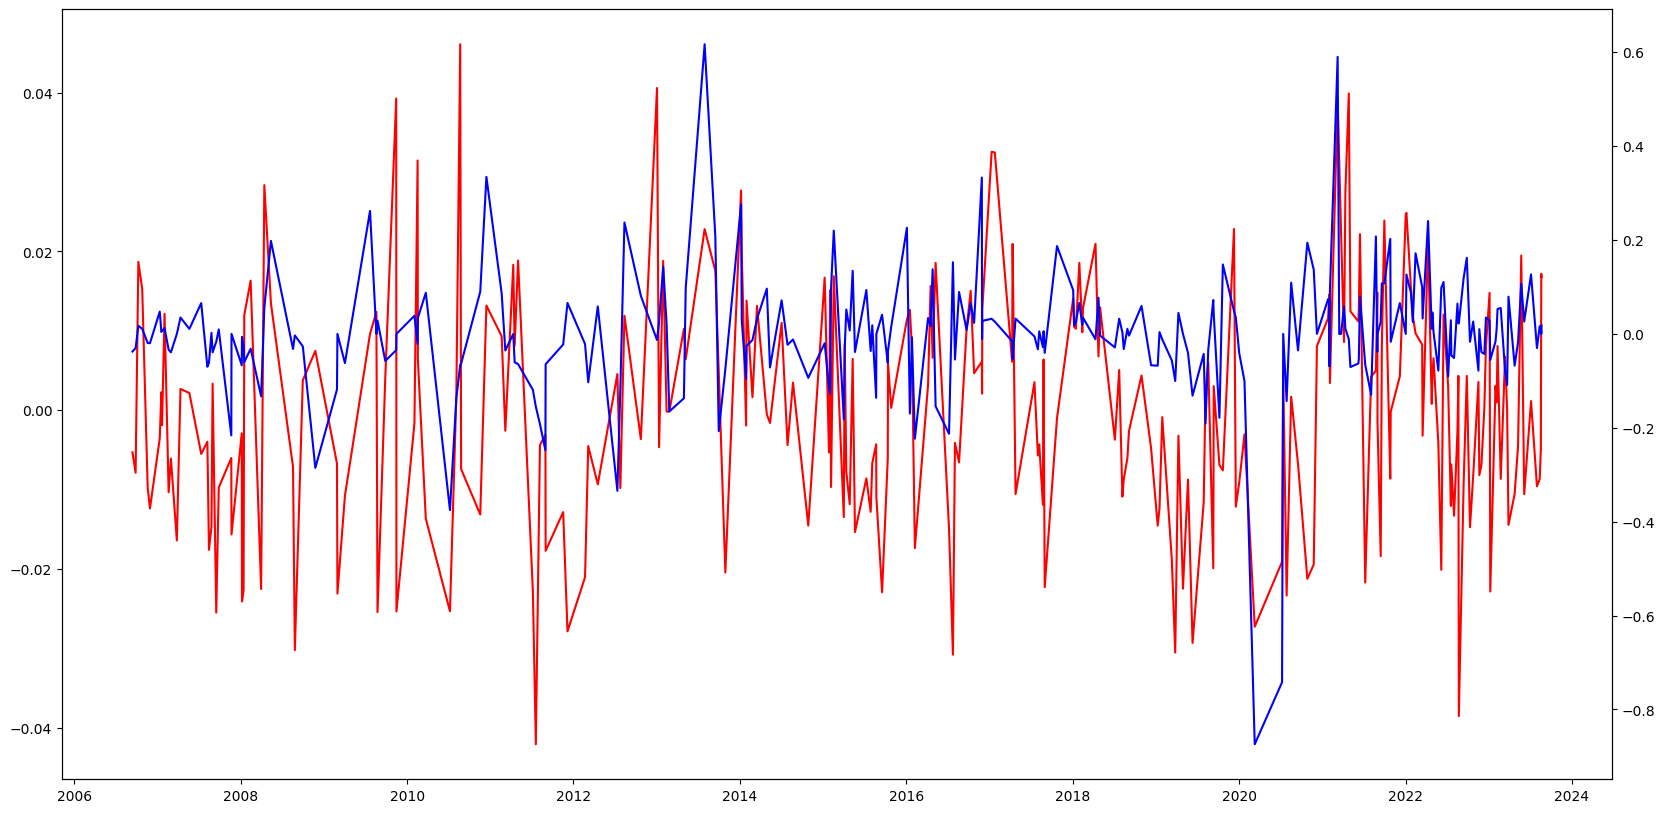

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
ax2 = ax.twinx()
ax.plot(log_series[0], color = "red")
ax2.plot(log_series[1], color = "blue")

In [14]:
df = tst.get_regression_summary(np.array(log_series[0]), np.array(log_series[1]))

NameError: name 'log_series' is not defined

In [13]:
df.tables[0].data

NameError: name 'df' is not defined

statsmodels.iolib.summary.Summary